# Quickstart (API)


This document is for teaching the basic usage of `coolbox` API and explaining some basic conceptions.
It is a good starting point for using CoolBox.

Interactive online version: [Binder](https://mybinder.org/v2/gh/GangCaoLab/CoolBox/HEAD?filepath=docs%2Fsource%2Fquick_start_API.ipynb)

First, let's import all the components from `coolbox.api`, and check your CoolBox version.

In [1]:
# change working directory
import os
os.chdir("../../")
print(f"Current working directory: {os.path.abspath(os.curdir)}")

In [2]:
import coolbox
from coolbox.api import *

In [3]:
coolbox.__version__

'0.3.0'

## Data preparation
### Testing dataset

Here, we use [a small testing dataset](https://github.com/GangCaoLab/CoolBox/tree/master/tests/test_data) for convenience.
This dataset contains files in differnet file formats,
and they are in the same genome range (chr9:4000000-6000000) of the human reference genome (hg19).

In [4]:
!pwd
!ls -lh tests/test_data/

/Users/bakezq/Desktop/workspace/CoolBox.nosync
total 197152
-rw-r--r--  1 bakezq  staff   787K Dec  6 04:11 bam_chr9_4000000_6000000.bam
-rw-r--r--  1 bakezq  staff   5.8K Jan 16 09:32 bam_chr9_4000000_6000000.bam.bai
-rw-r--r--  1 bakezq  staff   8.5K Dec  6 04:11 bed_chr9_4000000_6000000.bed
-rw-r--r--  1 bakezq  staff   2.2K Jan 16 09:32 bed_chr9_4000000_6000000.bed.bgz
-rw-r--r--  1 bakezq  staff   220B Jan 16 09:32 bed_chr9_4000000_6000000.bed.bgz.tbi
-rw-r--r--  1 bakezq  staff    18K Dec  6 04:11 bedgraph_chr9_4000000_6000000.bg
-rw-r--r--  1 bakezq  staff   264B Dec  6 04:11 bedpe_chr9_4000000_6000000.bedpe
-rw-r--r--  1 bakezq  staff   147B Jan 16 09:14 bedpe_chr9_4000000_6000000.bedpe.bgz
-rw-r--r--  1 bakezq  staff   160B Jan 16 09:14 bedpe_chr9_4000000_6000000.bedpe.bgz.px2
-rw-r--r--  1 bakezq  staff    31K Dec  6 04:11 bigwig_chr9_4000000_6000000.bw
-rw-r--r--  1 bakezq  staff    23M Jan 15 22:08 cool_chr1_89000000_90400000_for_cmp_1.mcool
-rw-r--r--  1 bakezq  staff    2

In [5]:
# Here, we define const values for reference files easily later
DATA_DIR = "tests/test_data"
TEST_RANGE = "chr9:4000000-6000000"
RANGE_MARK = "chr9_4000000_6000000"

## Track is the basic element

In CoolBox ploting system, "Track" is the basic element. If you have used genome browsers like [UCSC Genome Browser](https://genome.ucsc.edu/) or [WashU EpiGenome Browser](https://epigenomegateway.wustl.edu/), you must know what it is.

Basically, "Track" is an image that is related to a piece of continuous region on the reference genome. The most common track is the `bigWig` track, If you have read some papers about epigenomics you must have seen some figures like this:

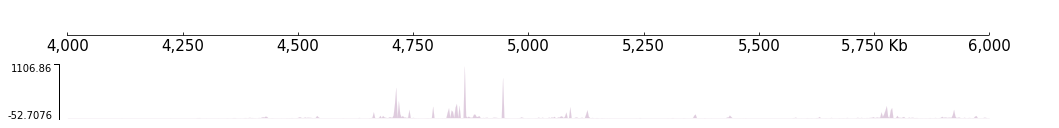

In [6]:
bigwig_path = f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw"

frame = XAxis() + BigWig(bigwig_path)  # input a file path
frame.plot(TEST_RANGE)  # input a genome range

Actually, `bigWig` is just one kind of track. There are other kinds of tracks in CoolBox used to display other kinds of genomic data like long range genome interaction from ChIA-PET and genome contact matrix from Hi-C.


### Track types

Now, CoolBox supports the following track types:


| Track Type  | Relevant file format | Description |
| :---------: | :---------: | :---------: |
| Track | `None` | Base class for all tracks. |
| XAxis | `None` | X axis of genome. |
| Spacer | `None` | For add vertical space between two tracks. |
| BAM | [.bam](https://samtools.github.io/hts-specs/SAMv1.pdf) | BAM track for visualize the coverage or alignment. |
| GTF | [.gtf](https://genome.ucsc.edu/FAQ/FAQformat.html#format4) | Track of GTF file, for visualize gene annotation. |
| HistBase | `None` | Base class for all hist-like tracks. |
| BigWig | [.bigwig](https://genome.ucsc.edu/goldenPath/help/bigWig.html#:~:text=BigWig%20files%20are%20created%20from,to%20the%20Genome%20Browser%20server.) | Track of bigWig file. |
| BedGraph | [.bedgraph](https://genome.ucsc.edu/goldenPath/help/bedgraph.html) | Track of bedgraph file. |
| BAMCov | [.bam](https://samtools.github.io/hts-specs/SAMv1.pdf) | BAM Coverage track for visualize reads coverage. |
| SNP | .tsv, .vcf | Track for show SNPs Manhattan plot. Input file is a tab-split file, contain SNP's chrom, position, pvalue information. |
| Virtual4C | .cool, .mcool, .hic | Virtual 4C track, using Hi-C data to mimic 4C. |
| DiScore | .cool, .mcool, .hic | Directionality index of Hi-C matrix for detecting TAD. |
| InsuScore | .cool, .mcool, .hic | Insulation score of Hi-C matrix for inferring TAD borders. |
| BedBase | `None` | Base class for all bed-like(1d intervals) tracks. |
| BED | [.bed](https://genome.ucsc.edu/FAQ/FAQformat.html#format1) | Track of Bed file, for visualization genome annotation,like refSeq genes and chromatin states or TAD intervals. |
| TADCoverage | [.bed](https://genome.ucsc.edu/FAQ/FAQformat.html#format1) | Track Coverage for showing TAD(topologically associated domains) upon a HicMat track. |
| ArcsBase | `None` | Nase class for all bedpe-like(2d contacts/regions) tracks. |
| Arcs | .pairs, .bedpe | Show the chromosome interactions get from ChIA-PET or Hi-C loop data. |
| BEDPE | [.bedpe](https://bedtools.readthedocs.io/en/latest/content/general-usage.html#bedpe-format) | Same to Arcs, specific to BEDPE file |
| Pairs | [.pairs](https://github.com/4dn-dcic/pairix/blob/master/pairs_format_specification.md) | Same to Arcs, specific to Pairs file |
| HiCPeaksCoverage | .bedpe, .pairs | HiCPeaks Coverage track for displaying peaks upon a HicMat track. |
| HiCMatBase | `None` | Base class for all matrix-like(2d ndarray) tracks. |
| HiCMat | .cool, .mcool, .hic | Show the chromosome contact matrix from Hi-C data. |
| Cool | [.cool, .mcool](https://github.com/mirnylab/cooler) | Same to HiCMat, specific to cooler's `.cool` or `.mcool` format. |
| DotHiC | [.hic](https://github.com/aidenlab/juicer/wiki/Data#hic-files) | Same to HiCMat, specific to juicer `.hic` file format. |
| HiCDiff | .cool, .mcool, .hic | Show the difference between two contact matrix. |
| Selfish | .cool, .mcool, .hic | Show the difference computed by Selfish algorithm between two contact matrix. |


### Other kinds of tracks:

#### BED track :
BED track is used to show the genome annotation information like RefSeq or chromatin states.
Here, we have the RefSeq data which can be visualized with `coolbox.api.BED`:

Visualizing RefSeq with CoolBox:

[WARNING:plot.py:56 -           plot_genes()] *WARNING* Color set to 'bed_rgb', but bed file does not have the rgb field. The color has been set to #1f78b4


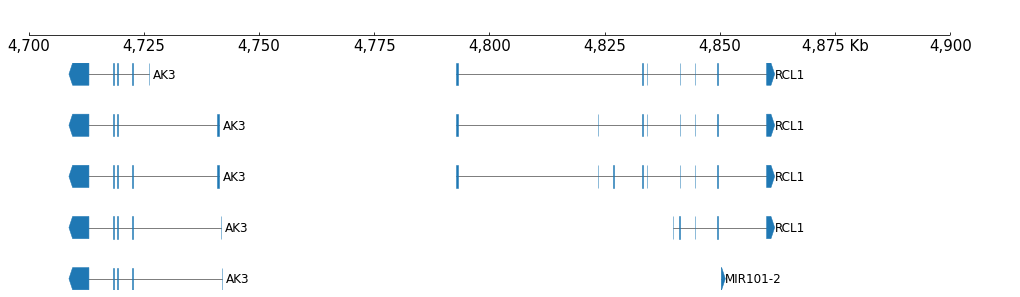

In [7]:
frame = XAxis() + BED(f"{DATA_DIR}/bed_{RANGE_MARK}.bed") + TrackHeight(8)

frame.plot("chr9:4700000-4900000")

#### GTFtrack :
GTF track is also used to visualize gene annotations:

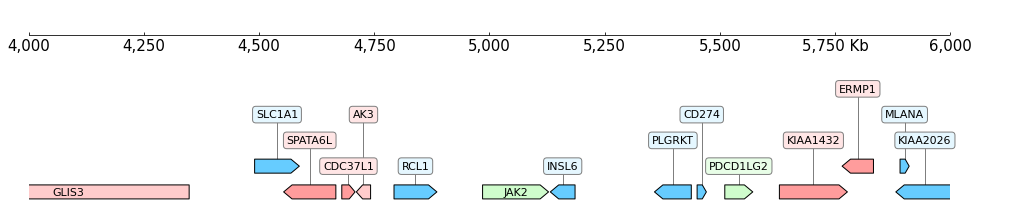

In [8]:
frame = XAxis() + GTF(f"{DATA_DIR}/gtf_{RANGE_MARK}.gtf") + TrackHeight(5)

frame.plot(TEST_RANGE)

#### Hi-C (.cool) Track

CoolBox also supports Hi-C data visualization.

CoolBox supports two types of input format for Hi-C matrix data, 
[.cool](https://github.com/GangCaoLab/CoolBox/wiki/Hi-C#cool) 
and [.hic](https://github.com/GangCaoLab/CoolBox/wiki/Hi-C#dothic) file.

Their API is very similar, 
You can use `CoolBox.api.HiCMat` to visualize both.

Here, we use a `.cool` file as an example.

##### `multi-cool(.mcool)` for multiple resolution Hi-C matrix

Cooler file supports multi-resolution interaction matrix storage (normally file name ends with `.mcool`), this feature allows us take appropriate resolution matrix data depending on the corresponding genome region size, it lets program respond fast when plotting the Hi-C matrix.

The multi-resolution cooler file is recommended. You can use `cooler zoomify` command to create multi-resolution cooler file from a single resolution cooler file.

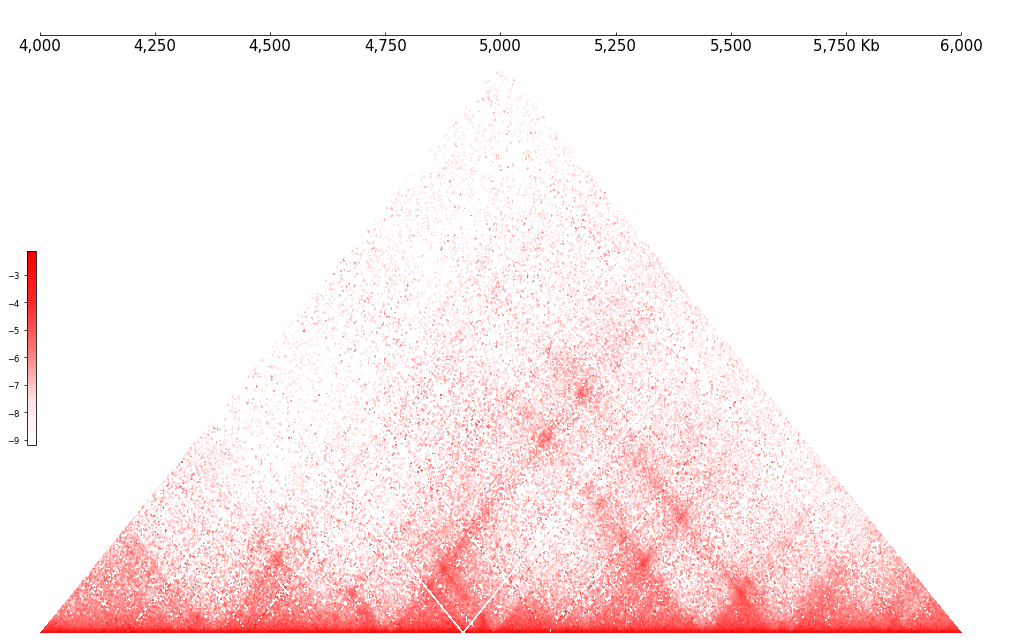

In [9]:
frame = XAxis() + HiCMat(f"{DATA_DIR}/cool_{RANGE_MARK}.mcool")
frame.plot(TEST_RANGE)

Default Hi-C Track will be plotted in `triangular` style. It also can be plotted in `matrix` or `window` style.

Just specify the `style` parameter, when creating Cool instance, like this: 

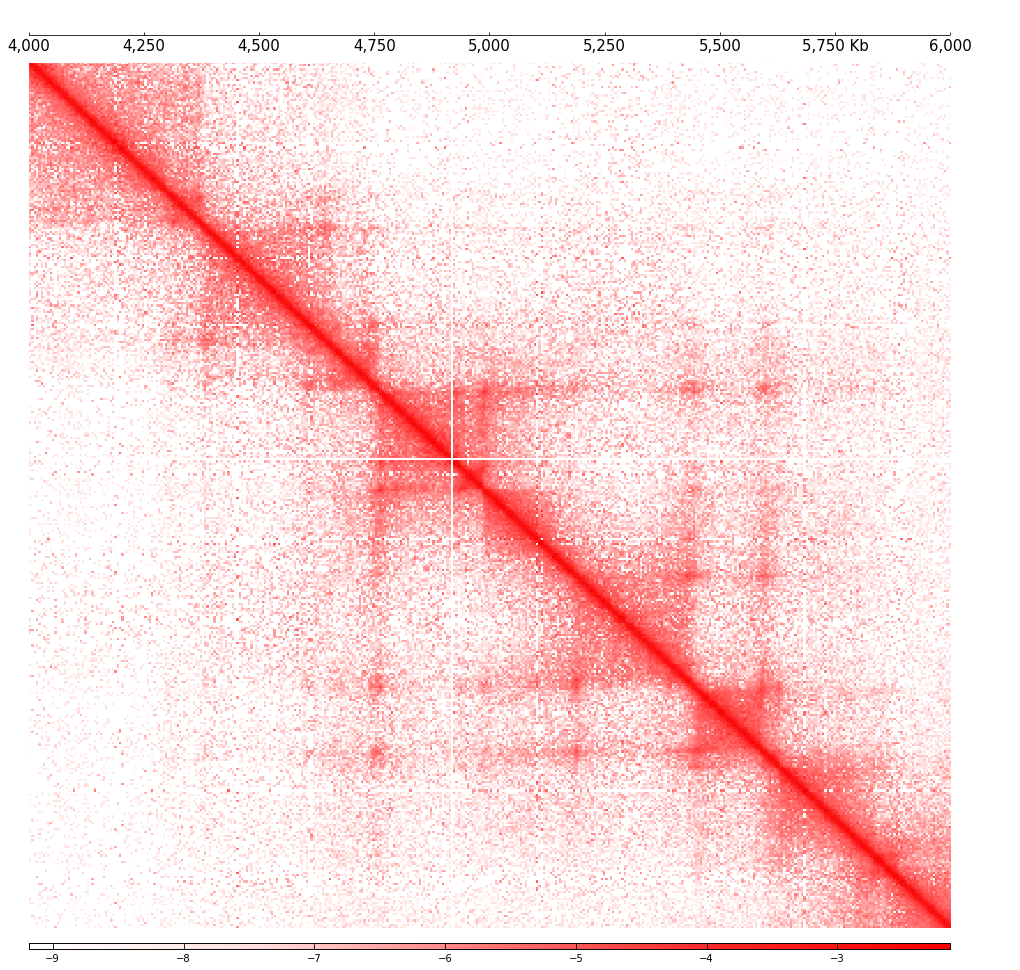

In [10]:
frame = XAxis() + \
    HiCMat(f"{DATA_DIR}/cool_{RANGE_MARK}.mcool", style='matrix', color_bar='horizontal')
frame.plot(TEST_RANGE)

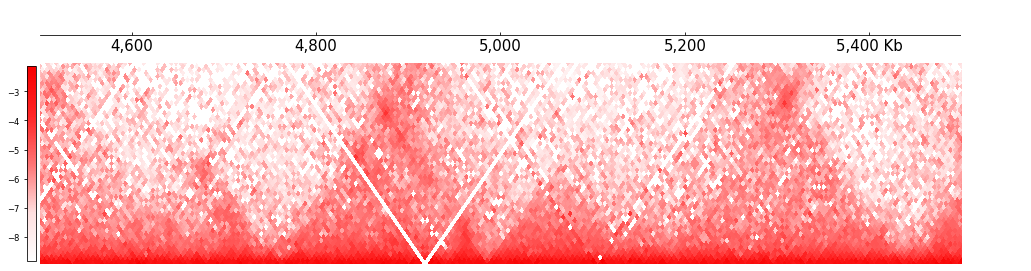

In [11]:
frame = XAxis() + HiCMat(f"{DATA_DIR}/cool_{RANGE_MARK}.mcool", style='window', depth_ratio=0.3)
frame.plot("chr9:4500000-5500000")

`Cool` shows balanced matrix as default, if you want to show the unbalanced matrix, you can set as:

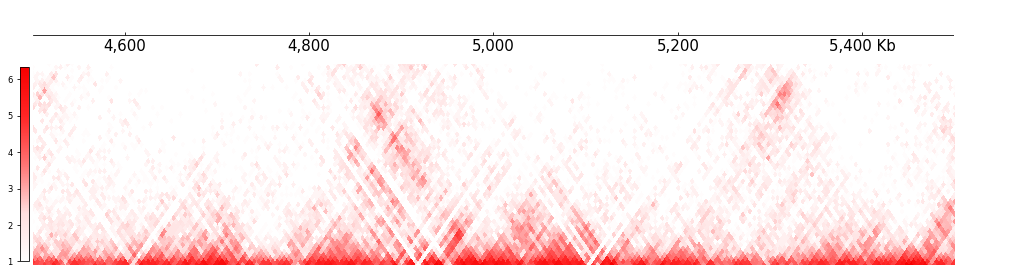

In [12]:
frame = XAxis() + HiCMat(f"{DATA_DIR}/cool_{RANGE_MARK}.mcool", style='window', depth_ratio=0.3, balance=False) + MinValue(1)
frame.plot("chr9:4500000-5500000")

#### Arcs Track

Technologies like ChIA-PET or HiChIP can produce many long-range genome-wide chromatin interactions.

And, sometimes, the Hi-C contact matrix contains too much information than needed. 
When we only need some of the most important interactions from it, 
we can use some tools like [HICCUPS](https://github.com/theaidenlab/juicer/wiki/HiCCUPS) to call the most significant interactions, or "peaks" from the contact matrix.

In either case, Arcs Track can be used to visulize the data.
Arcs track accepts `.pairs` or `.bedpe` format:

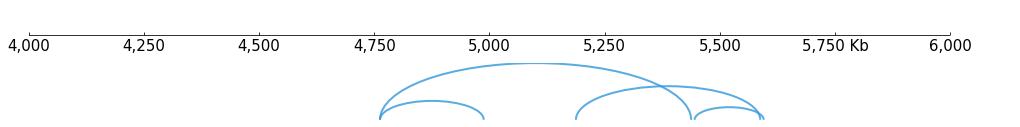

In [13]:
# BEDPE
frame = XAxis() + Arcs(f"{DATA_DIR}/bedpe_{RANGE_MARK}.bedpe", line_width=2)
frame.plot(TEST_RANGE)

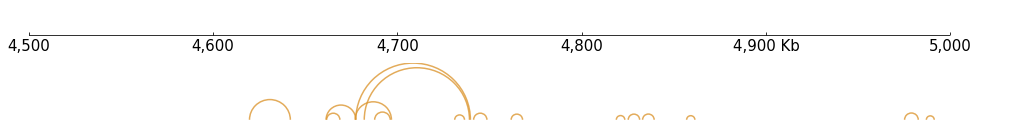

In [14]:
# Pairs
frame = XAxis() + Arcs(f"{DATA_DIR}/pairs_{RANGE_MARK}.pairs", line_width=1.5)
frame.plot("chr9:4500000-5000000")

## Compose Tracks to Frame

In CoolBox you can compose tracks with "+" operator, as shown above, compose `XAxis` track and a `bigwig` track to a frame object:

```
frame = XAxis() + BigWig("data/K562_RNASeq.bigWig")
```

Frame is a higher level object and it denotes a set of related tracks. We can use a long "+" expression to compose a complex Frame.

In [15]:
cool1 = Cool(f"{DATA_DIR}/cool_{RANGE_MARK}.mcool")

frame = XAxis() + \
    cool1 + Title("Hi-C(.cool)") + \
    Spacer(0.5) + \
    Virtual4C(cool1, "chr9:4986000-4986000") + Title("Virtual4C") + \
    Spacer(0.5) + \
    BAMCov(f"{DATA_DIR}/bam_{RANGE_MARK}.bam") + Title("BAM Coverage") +\
    Spacer(0.5) + \
    Arcs(f"{DATA_DIR}/bedpe_{RANGE_MARK}.bedpe") + Inverted() + Title("Arcs(BEDPE)") + \
    Spacer(0.1) + \
    Arcs(f"{DATA_DIR}/pairs_{RANGE_MARK}.pairs") + Inverted() + Title("Arcs(Pairs)") + \
    GTF(f"{DATA_DIR}/gtf_{RANGE_MARK}.gtf", length_ratio_thresh=0.005) + TrackHeight(6) + Title("GTF Annotation") + \
    Spacer(0.1) + \
    BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw") + Title("BigWig")

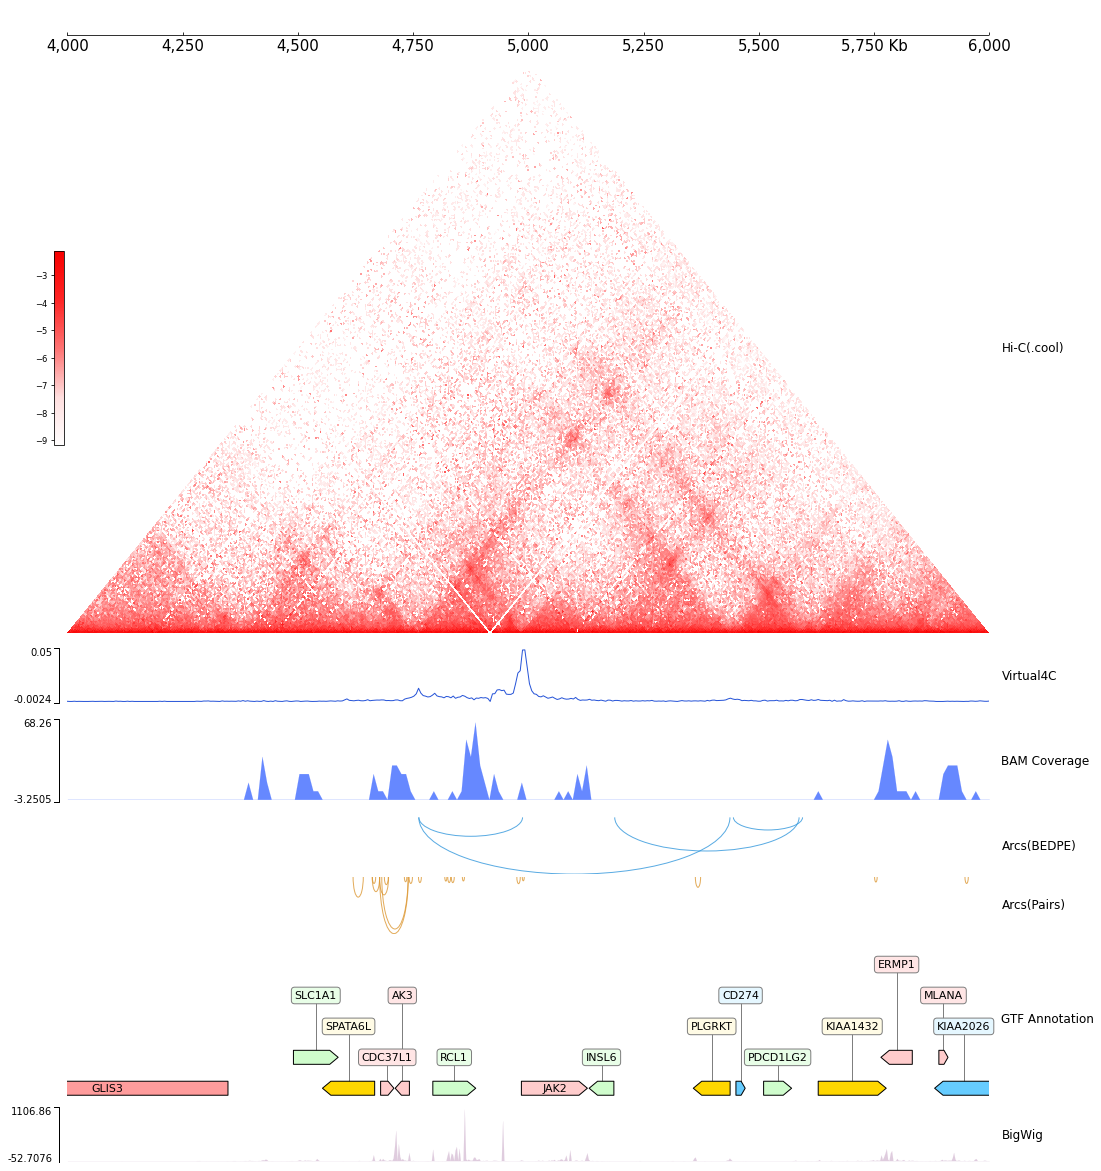

In [16]:
frame.plot(TEST_RANGE)

## Adjust Tracks and Frame with Feature

Maybe you have noticed that, in the complex expression above, there are some elements which added with 
Tracks is not a Track, for example, the `TrackHeight`, `Title` and `Title`.

These elements are `Feature` and they represent the features of the Track.

For example, we set the color and track height feature of a `bigWig` track.

In [17]:
frame = XAxis() + \
        BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw") + \
        Color("#ce00ce") + TrackHeight(8)

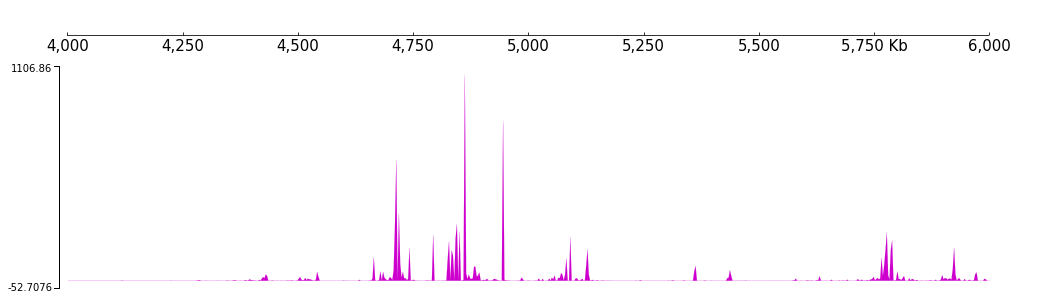

In [18]:
frame.plot(TEST_RANGE)

And we can adjust the min value and max value of the track:

In [19]:
frame = XAxis() + \
        BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw") + \
        Color("#ce00ce") + TrackHeight(5) + \
        MinValue(0) + MaxValue(50)

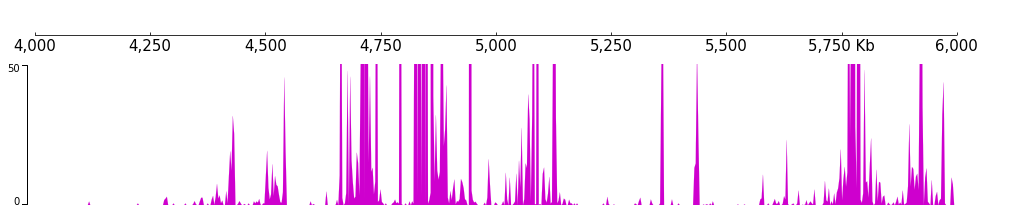

In [20]:
frame.plot(TEST_RANGE)

### `with` statement

By the way, there are one useful trick, you can use Feature with "`with statement`", like:

In [21]:
with Color("#fd9c6b"):
    frame1 = XAxis() +\
             BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw") +\
             BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw")  +\
             BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw")

with Color("#66ccff"):
    frame2 = BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw") +\
             BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw")
        
frame = frame1 + frame2

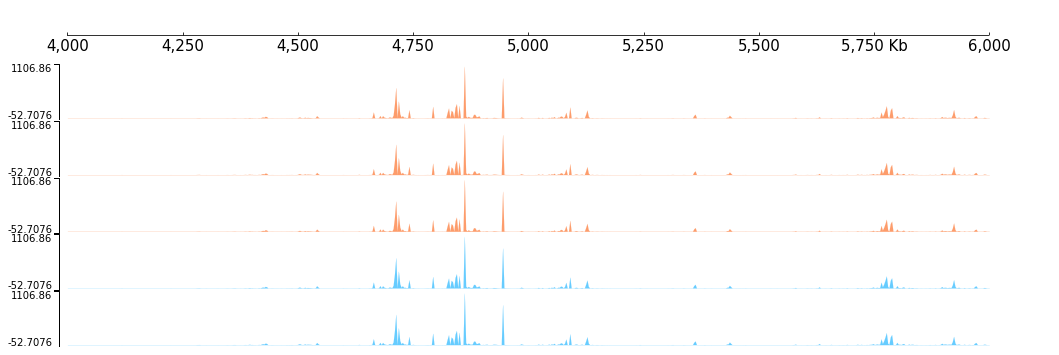

In [22]:
frame.plot(TEST_RANGE)

As shown above, any tracks created inside the "`with statement`" will have the specified feature.

Using this trick, we can simplify the complex expression:

## Coverage

Sometimes we need to draw some graphics above the original figure, for example, 
the vertical lines and highlight regions. CoolBox has another kinds of element, the `Coverage`.
We can add coverage with track, after added to track, coverage will be plotted above the track when the track is plotted.

### Vertical lines

In [23]:
locus = [("chr9", 4500000), ("chr9", 5000000)]
frame = XAxis() + BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw") + Vlines(locus, line_width=2)

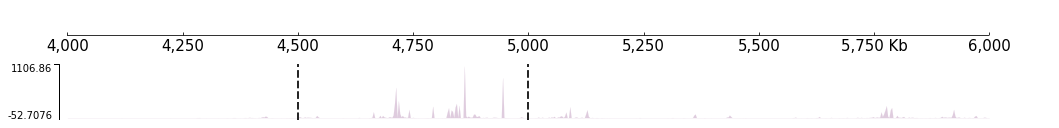

In [24]:
frame.plot(TEST_RANGE)

Like the `Feature` if you want a set of tracks with same coverge, you can use the "`with statement`":

In [25]:
with Vlines(locus, line_width=2):
    frame = BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw") +\
            BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw") +\
            BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw")
frame = XAxis() + frame + XAxis()

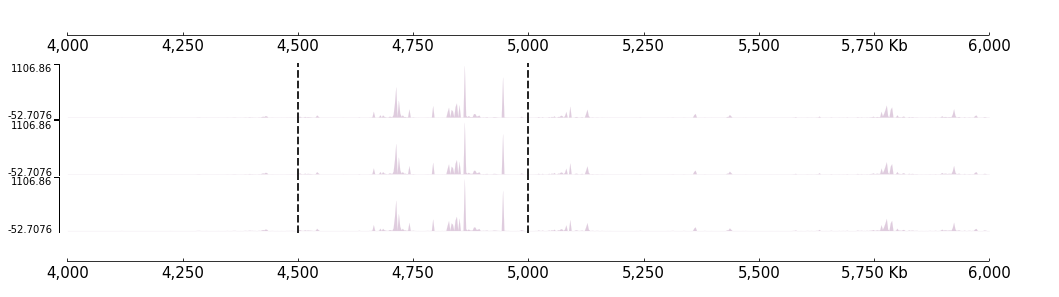

In [26]:
frame.plot(TEST_RANGE)

Or, you can also use `*` operator do this: 

In [27]:
frame = BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw") +\
        BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw") +\
        BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw")
frame = frame * Vlines(locus, line_width=2)
frame = XAxis() + frame + XAxis()

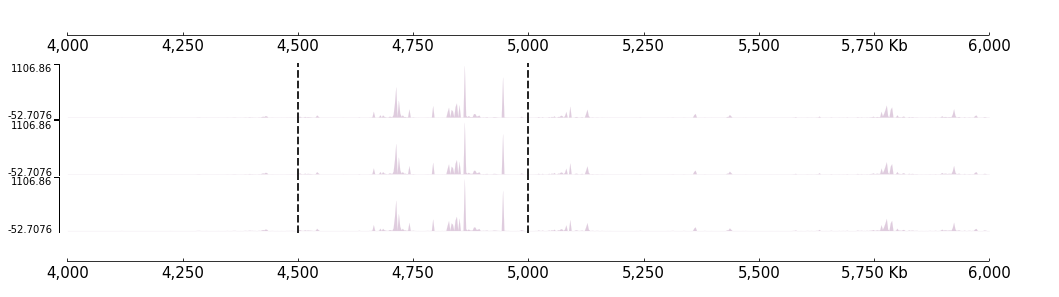

In [28]:
frame.plot(TEST_RANGE)

### HighLights

In [29]:
regions= ["chr9:4600000-5000000", "chr9:5750000-5950000"]

highlights = HighLights(regions, color="green", alpha=0.05)

with highlights, Color("#aa5cff"):
    frame = BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw") +\
            BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw") +\
            BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw")

frame = XAxis() + frame + XAxis()

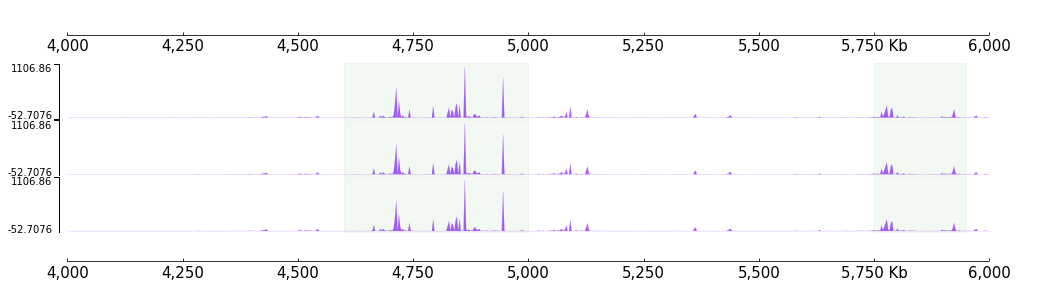

In [30]:
frame.plot(TEST_RANGE)

## Explore Genomic Data with `coolbox.api.Browser`

When you want to explore the data, you will change the genome region window very frequently.
Under these circumstances, when you want to do the operations like "move right", "move left", "zoom in", "zoom out",
if you use above `Frame.plot` API to plot the figure, you must change parameters and run again.
It is tiresome and boring.
In order to solve this problem, CoolBox impletmented a simple GUI with [ipywidgets](https://ipywidgets.readthedocs.io/).

You can create a `Browser` instance with a composed frame, and call `.show()` method to show the browser.


In [31]:
cool1 = Cool(f"{DATA_DIR}/cool_{RANGE_MARK}.mcool")

frame = XAxis() + \
    cool1 + Title("Hi-C(.cool)") + \
    Spacer(0.5) + \
    Virtual4C(cool1, "chr9:4986000-4986000") + Title("Virtual4C") + \
    Spacer(0.5) + \
    BAM(f"{DATA_DIR}/bam_{RANGE_MARK}.bam") + Title("BAM Coverage") +\
    Spacer(0.5) + \
    Arcs(f"{DATA_DIR}/bedpe_{RANGE_MARK}.bedpe") + Inverted() + Title("Arcs(BEDPE)") + \
    Spacer(0.1) + \
    Arcs(f"{DATA_DIR}/pairs_{RANGE_MARK}.pairs") + Inverted() + Title("Arcs(Pairs)") + \
    GTF(f"{DATA_DIR}/gtf_{RANGE_MARK}.gtf", length_ratio_thresh=0.005) + TrackHeight(6) + Title("GTF Annotation") + \
    Spacer(0.1) + \
    BigWig(f"{DATA_DIR}/bigwig_{RANGE_MARK}.bw") + Title("BigWig")

bsr = Browser(frame)
bsr.goto(TEST_RANGE)

**Note: browser is valid only when the jupyter kernel is active**

In [32]:
bsr.show()

## Fetch precise data use `.fetch_data` API

In CoolBox, data and figure are bound together with a single Python object. So, you can fetch precise data of what you see in the figure.

Call the `.fetch_data` method of `Browser` or `Frame`, will return an `collection.OrderDict` which stores many `pandas.Dataframe` objects corresponding to each track in the browser or frame, and the data is only about the current genome region.

In [33]:
bsr.tracks

OrderedDict([('XAxis.21', <coolbox.core.track.pseudo.XAxis at 0x7fc1191fbaf0>),
             ('Cool.6',
              <coolbox.core.track.hicmat.cool.Cool at 0x7fc0ffa16790>),
             ('Spacer.6',
              <coolbox.core.track.pseudo.Spacer at 0x7fc0ffa16eb0>),
             ('Virtual4C.2',
              <coolbox.core.track.hist.hicfeature.Virtual4C at 0x7fc0ffa160a0>),
             ('Spacer.7',
              <coolbox.core.track.pseudo.Spacer at 0x7fc0ffa163d0>),
             ('BAM.1', <coolbox.core.track.bam.BAM at 0x7fc0ffa164c0>),
             ('Spacer.8',
              <coolbox.core.track.pseudo.Spacer at 0x7fc0ffa16e50>),
             ('BEDPE.3',
              <coolbox.core.track.arcs.bedpe.BEDPE at 0x7fc0ffa162b0>),
             ('Spacer.9',
              <coolbox.core.track.pseudo.Spacer at 0x7fc0ffa16070>),
             ('Pairs.3',
              <coolbox.core.track.arcs.pairs.Pairs at 0x7fc0ffa166a0>),
             ('GTF.3', <coolbox.core.track.gtf.GTF at 0x7fc0ffa16e80

In [34]:
current_data = bsr.fetch_data()

In [35]:
list(current_data.keys())

['XAxis.21',
 'Cool.6',
 'Spacer.6',
 'Virtual4C.2',
 'Spacer.7',
 'BAM.1',
 'Spacer.8',
 'BEDPE.3',
 'Spacer.9',
 'Pairs.3',
 'GTF.3',
 'Spacer.10',
 'BigWig.20']

Data of each track related to the current genome range are stored in this dict:

In [36]:
current_cool = current_data['Cool.6']

In [37]:
print(type(current_cool))
current_cool.shape

<class 'numpy.ndarray'>


(401, 401)

In [38]:
current_data['GTF.3'].head(5)

seqname                source     feature    start      end score strand  \
0    chr9        protein_coding        gene  3824127  4348392     .      -   
1    chr9        protein_coding  transcript  3824127  4152183     .      -   
2    chr9        protein_coding  transcript  3827698  4299916     .      -   
3    chr9       retained_intron  transcript  3855437  4118017     .      -   
4    chr9  processed_transcript  transcript  3932360  4081361     .      -   

  frame                                          attribute gene_name  
0     .  gene_id "ENSG00000107249"; gene_name "GLIS3"; ...     GLIS3  
1     .  gene_id "ENSG00000107249"; transcript_id "ENST...     GLIS3  
2     .  gene_id "ENSG00000107249"; transcript_id "ENST...     GLIS3  
3     .  gene_id "ENSG00000107249"; transcript_id "ENST...     GLIS3  
4     .  gene_id "ENSG00000107249"; transcript_id "ENST...     GLIS3

We can perform some statistics analysis on it. For example, count the distribution of interaction count, etc...


## Taken together

[WARNING:plot.py:56 -           plot_genes()] *WARNING* Color set to 'bed_rgb', but bed file does not have the rgb field. The color has been set to #1f78b4
[WARNING:plot.py:56 -           plot_genes()] *WARNING* Color set to 'bed_rgb', but bed file does not have the rgb field. The color has been set to #1f78b4


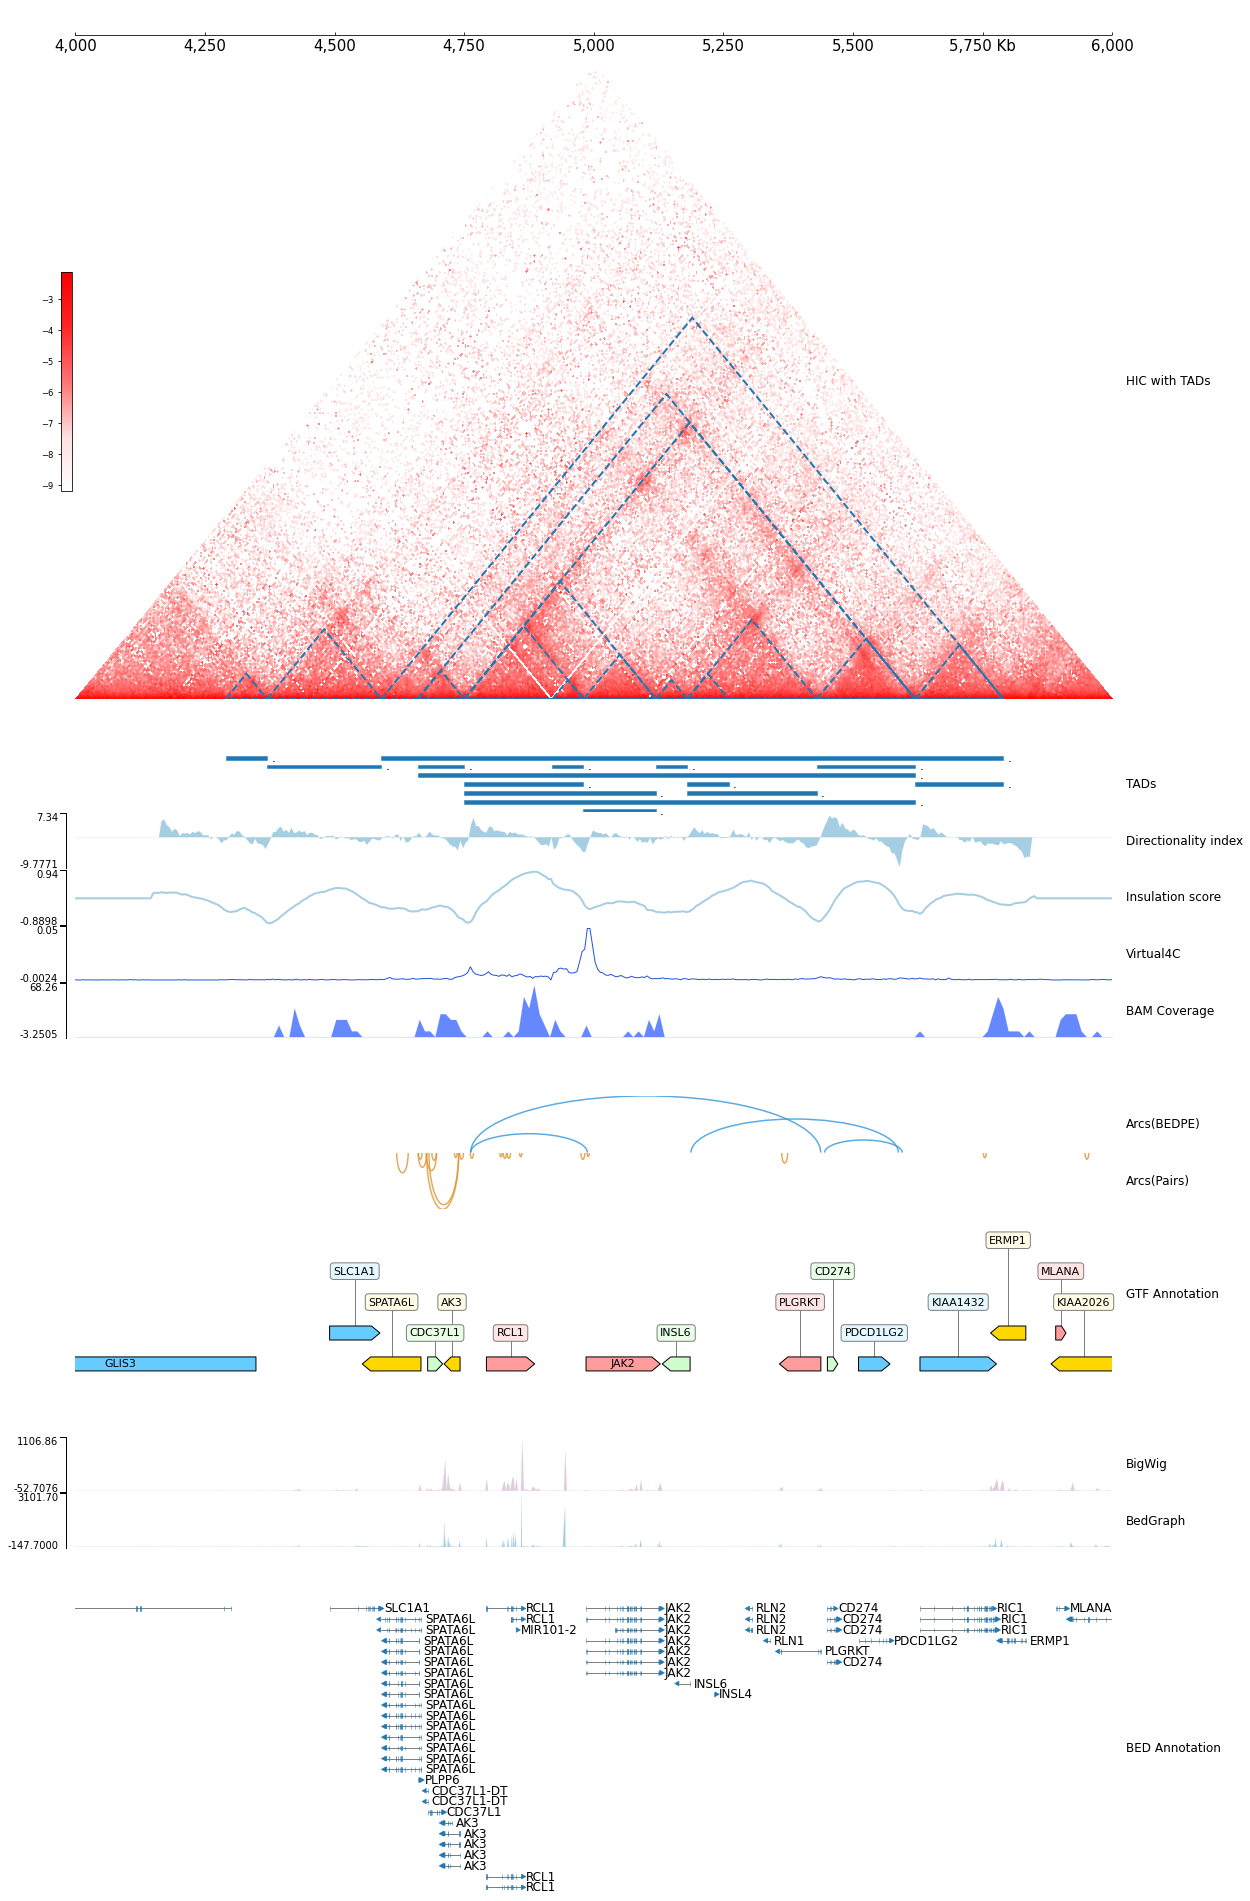

In [39]:
DATA_DIR = f"tests/test_data"
test_interval = "chr9:4000000-6000000"
test_itv = test_interval.replace(':', '_').replace('-', '_')

cool1 = Cool(f"{DATA_DIR}/cool_{test_itv}.mcool", cmap="JuiceBoxLike", style='window', color_bar='vertical')
with TrackHeight(2):
    frame = XAxis() + \
        cool1 + Title("Hi-C(.cool)") + \
        TADCoverage(f"{DATA_DIR}/tad_{test_itv}.bed", border_only=True, alpha=1) + Title("HIC with TADs") + \
        Spacer(0.1) + \
        BED(f"{DATA_DIR}/tad_{test_itv}.bed", border_only=True, alpha=1) + Title("TADs") + \
        DiScore(cool1, window_size=30) + Feature(title="Directionality index") + \
        InsuScore(cool1, window_size=30) + Title("Insulation score") + \
        Virtual4C(cool1, "chr9:4986000-4986000") + Title("Virtual4C") + \
        BAMCov(f"{DATA_DIR}/bam_{test_itv}.bam") + Title("BAM Coverage") +\
        Spacer(0.1) + \
        Arcs(f"{DATA_DIR}/bedpe_{test_itv}.bedpe", line_width=1.5) + Title("Arcs(BEDPE)") + \
        Arcs(f"{DATA_DIR}/pairs_{test_itv}.pairs", line_width=1.5) + Inverted() + Title("Arcs(Pairs)") + \
        GTF(f"{DATA_DIR}/gtf_{test_itv}.gtf", length_ratio_thresh=0.005) + TrackHeight(6) + Title("GTF Annotation") + \
        Spacer(0.1) + \
        BigWig(f"{DATA_DIR}/bigwig_{test_itv}.bw") + Title("BigWig") + \
        BedGraph(f"{DATA_DIR}/bedgraph_{test_itv}.bg") + Title("BedGraph") + \
        Spacer(0.1) + \
        BED(f"{DATA_DIR}/bed_{test_itv}.bed") + Feature(height=10, title="BED Annotation")
frame.properties['width'] = 45
frame.goto(test_interval)
frame.show()
